___
# Ciência dos Dados - PROJETO 1

## Gustavo Schlieper e Giovanni Pertence
___

## Perfil dos brasileiros economicamente ativos

___
## Introdução

Neste Projeto criaremos os perfis de brasileiros economicamente ativos em 2011 e 2015. Para isso utilizaremos as seguintes variáveis:

    -Sexo(V0302);
    -Idade do morador na data de referência(V8005);
    -Condição de atividade na semana de referência para pessoas de 10 anos ou mais de idade(V4704);
    -Grupamentos de atividade principal do empreendimento do trabalho principal da semana de referência para pessoas de 10 anos ou mais de idade(V4809);
    -Horas habitualmente trabalhadas por semana em todos os trabalhos da semana de referência para pessoas de 10 anos ou mais de idade(V4707);
    -Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade(V4718);
    -Tipo de família para todas as unidades domiciliares (em todos os tipos de família podem existir pessoas cuja condição na família era outro parente, agregado, pensionista, empregado doméstico ou parente do empregado doméstico)(V4723);
    -Nível de instrução mais elevado alcançado (todas as pessoas)(V4745).

___
## Filtros da base de dados

Impede a criaçào de uma segunda barra deslisante vertical

In [85]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [126]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import math
import os

In [70]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\gugat\Desktop\Insper DS 2018.1\2.1 semestre\Dados\Projeto 1\CD_19.1\Projeto 1


In [71]:
#Leitura dos dados de 2015
dados = pd.read_csv('PES2015.csv',sep=',')

#Filtrando variáveis
Dados_Filtrado = dados.loc[(dados.V0302)|(dados.V8005)|(dados.V4704)|(dados.V4809)|(dados.V4707)|(dados.V4718)|(dados.V4723)|\
                           (dados.V4745) , ['V0302','V8005','V4704','V4809','V4707','V4718','V4723','V4745']]

#Trocando o nome das colunas
Dados_Filtrado.rename(columns={'V0302':'Sexo','V8005':'Idade','V4704':'Condição de atividade',\
                               'V4809':'Atividade principal','V4707':'Horas habitualmente trabalhadas por semana',\
                             'V4718':'Rendimento mensal','V4723':'Tipo de família','V4745':'Nível de instrução' },inplace=True)

#Definindo as variáveis como categóricas
Dados_Filtrado.Sexo = Dados_Filtrado.Sexo.astype('category')
Dados_Filtrado.Idade = Dados_Filtrado.Idade.astype('float')
Dados_Filtrado['Condição de atividade'] = Dados_Filtrado['Condição de atividade'].astype('category')
Dados_Filtrado['Atividade principal'] = Dados_Filtrado['Atividade principal'].astype('category')
Dados_Filtrado['Horas habitualmente trabalhadas por semana'] = Dados_Filtrado['Horas habitualmente trabalhadas por semana']\
.astype('category')
Dados_Filtrado['Tipo de família'] = Dados_Filtrado['Tipo de família'].astype('category')
Dados_Filtrado['Nível de instrução'] = Dados_Filtrado['Nível de instrução'].astype('category')
Dados_Filtrado['Rendimento mensal'] = Dados_Filtrado['Rendimento mensal'].astype('float')


In [72]:
#Traduzindo os tipos pelas descrições
Dados_Filtrado.Sexo.cat.categories = (['M','F'])
Dados_Filtrado['Condição de atividade'].cat.categories = (['Economicamente ativas','Não economicamente ativas'])
Dados_Filtrado['Atividade principal'].cat.categories = (['Agrícola','Outras atividades industriais','Indústria de transformação\
','Construção','Comércio e reparação','Alojamento e alimentação','Transporte, armazenagem e comunicação','Administração pública\
','Educação, saúde e serviços sociais','Serviços domésticos','Outros serviços coletivos, sociais e pessoais','Outras atividades\
','Atividades maldefinidas '])
Dados_Filtrado['Horas habitualmente trabalhadas por semana'].cat.categories = (['Até 14 horas','15 a 39 horas','40 a 44 horas'\
,'45 a 48 horas','49 horas ou mais'])
Dados_Filtrado['Tipo de família'].cat.categories = (['Casal sem filhos','Casal com todos os filhos menores de 14 anos',\
'Casal com todos os filhos de 14 anos ou mais','Casal com filhos menores de 14 anos e de 14 anos ou mais','Mãe com todos os \
filhos menores de 14 anos','Mãe com todos os filhos de 14 anos ou mais','Mãe com filhos menores de 14 anos e de 14 anos ou mais\
','Outros tipos de família'])
Dados_Filtrado['Nível de instrução'].cat.categories = (['Sem instrução','Fundamental incompleto ou equivalente','Fundamental \
completo ou equivalente','Médio incompleto ou equivalente','Médio completo ou equivalente','Superior incompleto ou equivalente'\
,'Superior completo ','Não determinado'])

#Remove PEA que não declarou renda, pois para esses o valor computado é 999 999 999 999.
Dados_Filtrado["Rendimento mensal"] = Dados_Filtrado["Rendimento mensal"][(Dados_Filtrado["Rendimento mensal"])<999999999999]

#Elimina os não economicamente ativos.
PEA = Dados_Filtrado[Dados_Filtrado['Condição de atividade'] =='Economicamente ativas']

#Como foi filtrada a condição de atividade a retiramos do DataFrame para evitar a poluição visual
PEA = PEA.drop(columns = 'Condição de atividade')

PEA.head(5)

,Sexo,Idade,Atividade principal,Horas habitualmente trabalhadas por semana,Rendimento mensal,Tipo de família,Nível de instrução
0,M,23.0,"Outros serviços coletivos, sociais e pessoais",40 a 44 horas,800.0,Outros tipos de família,Médio completo ou equivalente
1,F,23.0,Outras atividades,40 a 44 horas,1150.0,Outros tipos de família,Médio completo ou equivalente
2,F,35.0,Administração pública,40 a 44 horas,880.0,Casal com todos os filhos menores de 14 anos,Superior incompleto ou equivalente
3,M,34.0,Comércio e reparação,49 horas ou mais,3000.0,Casal com todos os filhos menores de 14 anos,Superior completo
7,F,18.0,Comércio e reparação,40 a 44 horas,880.0,Casal com todos os filhos menores de 14 anos,Médio completo ou equivalente


___
## Análise e Resultados

### Idade

Descrição da Idade
__________________________________________________
count    183089.000000
mean         38.272485
std          13.755427
min          10.000000
25%          27.000000
50%          37.000000
75%          48.000000
max          99.000000
Name: Idade, dtype: float64
__________________________________________________
Moda:  35.0
__________________________________________________


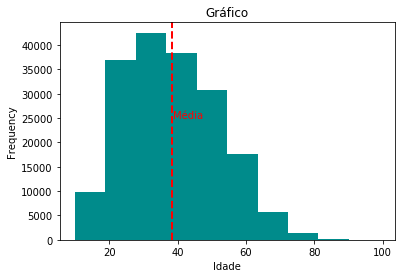

In [73]:
print("Descrição da Idade")
print(50*"_")
print(PEA.Idade.describe())
plot_idade = PEA.Idade.plot.hist(color = 'darkcyan')

def verticalLine(plot, x, y, color, nome, eixox, titulo):
    plot.axvline(x, color=color, linestyle="dashed", linewidth=2)
    plot.text(1.01*x, y, nome, color=color)
    plt.xlabel(eixox)
    plt.title(titulo)
    

verticalLine(plot_idade, PEA.Idade.mean(), 25000, "r", "Média", "Idade", "Gráfico")


moda_id = PEA.Idade.mode()

print(50*"_")
print("Moda: ",moda_id[0])
print(50*"_")

A moda da idade foi escolhida para representar o perfil do trabalhador(a) brasileiro.

### Nível de instrução

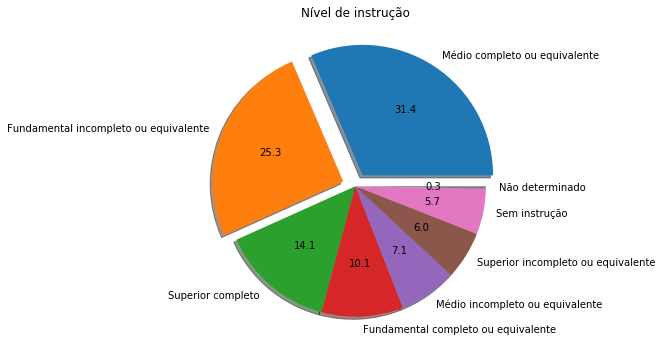

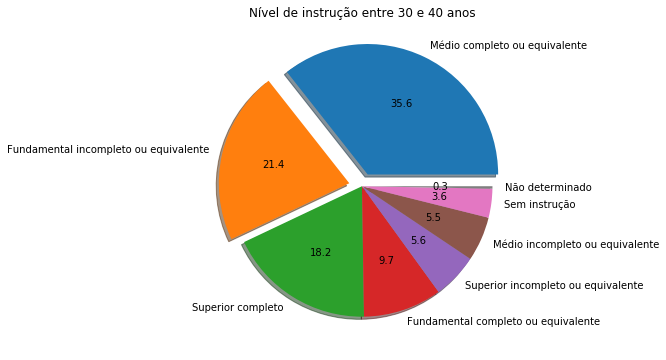

In [74]:
explode = (0.1, 0.1, 0, 0, 0, 0, 0, 0)

graf1 = (PEA['Nível de instrução'].value_counts()).plot(kind='pie',title='Nível de instrução',autopct='%.1f',figsize=(13, 6),\
explode=explode, shadow=True)
plt.ylabel("")
plt.show()


graf2 = (PEA['Nível de instrução'][(PEA.Idade <= 40) & (PEA.Idade >= 30)].value_counts())\
    .plot(kind='pie',title='Nível de instrução entre 30 e 40 anos',autopct='%.1f',figsize=(13, 6), explode=explode, shadow=True)
plt.ylabel("")
plt.show()

A divisão dos setores do nível de intrução da PEA na faixa de 30 à 40 anos representa a educaçao do brasileiro economicamente ativo.

### Horas de trabalho por semana

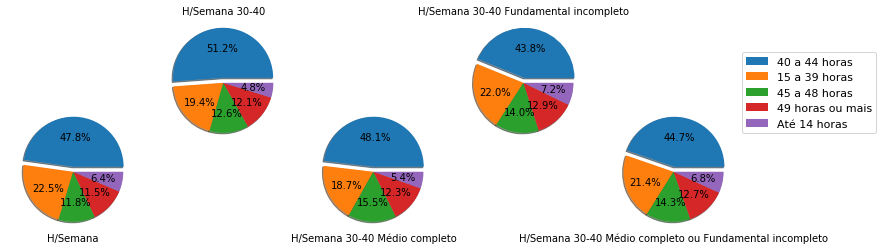

_______________________________________________________________________________________________________________________________


In [75]:
legenda = ['40 a 44 horas','15 a 39 horas','45 a 48 horas','49 horas ou mais','Até 14 horas']
explode = (0.1, 0, 0, 0, 0)

plt.subplot(151)
graf3 = (PEA['Horas habitualmente trabalhadas por semana'].value_counts()).plot(kind='pie',\
autopct='%.1f%%',figsize=(13, 6), labels=None, explode = explode, shadow = True)
plt.title('H/Semana',y=-0.1, size = 10)
plt.ylabel("")


plt.subplot(252)
graf4 = (PEA['Horas habitualmente trabalhadas por semana'][(PEA.Idade <= 40) & (PEA.Idade >= 30)].value_counts())\
.plot(kind='pie',autopct='%.1f%%',figsize=(13, 6), labels=None, explode = explode, shadow = True)
plt.title('H/Semana 30-40', size = 10)
plt.ylabel("")


plt.subplot(153)
graf5 = (PEA['Horas habitualmente trabalhadas por semana'][(PEA.Idade <= 40) & (PEA.Idade >= 30) & (PEA['Nível de instrução']\
== 'Médio incompleto ou equivalente')].value_counts()).plot(kind='pie',autopct='%.1f%%',figsize=(13, 6), labels=None, explode\
= explode, shadow = True)
plt.title('H/Semana 30-40 Médio completo',y=-0.1, size = 10)
plt.ylabel("")


plt.subplot(254)
graf6 = (PEA['Horas habitualmente trabalhadas por semana'][(PEA.Idade <= 40) & (PEA.Idade >= 30) & ((PEA['Nível de instrução']\
== 'Fundamental incompleto ou equivalente'))].value_counts()).plot(kind='pie',autopct='%.1f%%',figsize=(13, 6), labels=None, \
explode = explode, shadow = True)
plt.title('H/Semana 30-40 Fundamental incompleto', size = 10)
plt.ylabel("")

plt.subplot(155)
graf6 = (PEA['Horas habitualmente trabalhadas por semana'][(PEA.Idade <= 40) & (PEA.Idade >= 30) & ((PEA['Nível de instrução']\
== 'Fundamental incompleto ou equivalente') | (PEA['Nível de instrução'] == 'Médio incompleto ou equivalente'))]\
.value_counts()).plot(kind='pie',autopct='%.1f%%',figsize=(13, 6), labels=None, explode = explode, shadow = True)
plt.title('H/Semana 30-40 Médio completo ou Fundamental incompleto',y=-0.1, size = 10)
plt.ylabel("")
plt.legend(legenda, loc='best', fontsize= 11, bbox_to_anchor=(1,1.5))
plt.show()
print(127*'_')

grupo escolhido
__________________________________________________
count     5662.000000
mean      1081.602967
std        678.134851
min          0.000000
25%        788.000000
50%        930.000000
75%       1300.000000
max      15000.000000
Name: Rendimento mensal, dtype: float64


todos
__________________________________________________
count    163046.000000
mean       1669.065380
std        2709.651405
min           0.000000
25%         788.000000
50%        1000.000000
75%        1800.000000
max      200000.000000
Name: Rendimento mensal, dtype: float64


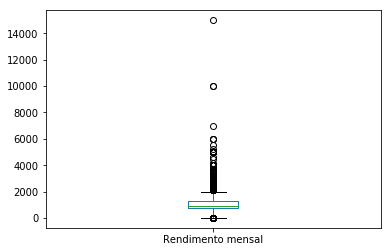

In [88]:
PEA1 = PEA[(PEA.Idade <= 40) & (PEA.Idade >= 30) & (PEA['Horas habitualmente trabalhadas por semana'] == '40 a 44 horas') & \
((PEA['Nível de instrução'] == 'Fundamental incompleto ou equivalente') | (PEA['Nível de instrução'] == \
'Médio incompleto ou equivalente'))]

print('grupo escolhido')
print(50*"_")
print(PEA1['Rendimento mensal'].describe())
print('\n')
print('todos')
print(50*"_")
print(PEA['Rendimento mensal'].describe())
PEA1['Rendimento mensal'].plot.box()

                               Histograma e distribuiçao normal da renda


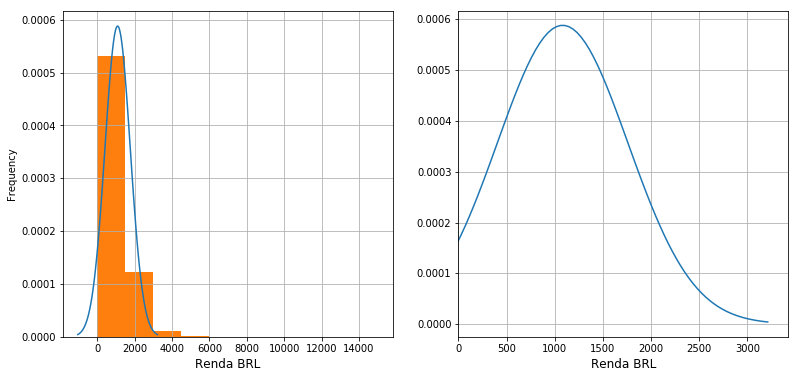

In [159]:
print(30*" ", "Histograma e distribuiçao normal da renda")
mu = 1081.602967
sigma = 678.134851
variance = sigma**2
x = np.linspace(mu - math.pi*sigma, mu + math.pi*sigma, 100)

plt.subplot(121)
plt.plot(x,scipy.stats.norm.pdf(x, mu, sigma))
PEA1['Rendimento mensal'].plot.hist(density=True, figsize=(13, 6))
plt.xlabel("Renda BRL", size = 12)
plt.grid()

plt.subplot(122)
plt.plot(x,scipy.stats.norm.pdf(x, mu, sigma))
plt.xlabel("Renda BRL", size = 12)
plt.grid()
plt.xlim(left=0)
plt.show()

___
## Conclusão 

Descreva aqui suas conclusões!